# Preliminary Analysis of Cybersecurity Dataset

In [1]:
import os

In [2]:
# Get all folder names
path = 'cybersec-imagery/cybersecurity'
folders = [os.path.join(path, o) for o in os.listdir(path) 
                    if os.path.isdir(os.path.join(path,o))]
folders.sort()

#Get all images names

images = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        images.append(os.path.join(r, file))

for img in images:
    if ".DS_Store" in img:
        images.remove(img)
    elif ".json" in img:
        images.remove(img)

In [3]:
#print(folders[:5])
len(folders)

110

In [4]:
len(images)

10515

We can see that there are a total of 10515 data from 110 days web searching.

In [6]:
# Get number of images in each folder

images_per_folder = []
for sub in folders:
    im = []
    for r, d, f in os.walk(sub):
        for file in f:
            im.append(file)
    images_per_folder.append(len(im))
    
print(images_per_folder)
#images_per_folder.index(47)

[101, 101, 101, 100, 101, 101, 101, 101, 101, 100, 101, 100, 98, 101, 101, 101, 101, 101, 100, 100, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 100, 101, 100, 100, 100, 99, 98, 100, 100, 100, 101, 100, 100, 100, 100, 100, 100, 100, 100, 101, 101, 100, 30, 101, 101, 98, 101, 101, 100, 101, 100, 100, 100, 100, 99, 99, 100, 99, 99, 10, 98, 98, 97, 98, 30, 98, 98, 98, 98, 98, 98, 98, 39, 99, 98, 99, 98, 98, 98, 98, 47, 98, 97, 98, 97, 97, 98, 99, 99, 98, 98, 99, 99, 99, 99, 100, 100, 101, 101, 100]


Though there were supposed to be 100 images (101 files including the .json file) in each folder, some of the folders contain less than 100 images. 

In [7]:
# A function which generates names of images in each folder

def get_images_name(folder_index):
    im = []
    for r, d, f in os.walk(folders[folder_index]):
        for file in f:
            im.append(folders[folder_index]+'/'+file)
            #im.append(file)
    im.sort()
    return im

#get_images_name(90)

In [8]:
# A function which generates names of images in each folder

def get_images_name(folder_index):
    im = []
    for r, d, f in os.walk(folders[folder_index]):
        for file in f:
            im.append(folders[folder_index]+'/'+file)
            #im.append(file)
    im.sort()
    return im

#get_images_name(90)

In [9]:
# Folders in which .json file doesn't exist

json = []
for folder in folders:
    json_exist = False
    for r, d, f in os.walk(folder):
        for aaa in f:
            if 'json' in aaa:
                json_exist = True
    if (not json_exist):
        json.append(folder)
        
json

['cybersec-imagery/cybersecurity/2017-12-03T01:00:21.958458',
 'cybersec-imagery/cybersecurity/2018-04-01T01:00:22.187481',
 'cybersec-imagery/cybersecurity/2018-05-06T01:00:21.566254',
 'cybersec-imagery/cybersecurity/2018-07-01T01:00:24.082322',
 'cybersec-imagery/cybersecurity/2018-08-26T01:00:22.723404']

In [10]:
def get_rgb(folder_id):
    #global colors_id
    global colors
    global bad_images
    c = []
    image_url = get_images_name(folder_id)
    for url in image_url:
        try:
            img = Image.open(url)
            img2 = img.resize((1, 1))
            color1 = img2.getpixel((0, 0))
            #colors.append(list(color1))
            c.append(list(color1))
            #for i in range(3):
                #colors[colors_id][i] = color1[i] 
            #colors_id += 1
        except:
            bad_images.append(url)
            pass
    return c

In [11]:
# Open colors file

import pickle

def get_colors_from_file():
    with open ('colors', 'rb') as fp:
        return pickle.load(fp);

def get_badimg_from_file():
    with open ('bad_images', 'rb') as fp:
        return pickle.load(fp); 
    
colors = get_colors_from_file()
bad_images = get_badimg_from_file()

In [12]:
len(bad_images)

1187

In [13]:
colors[:5]

[[5, 36, 54], [62, 115, 146], [37, 65, 227], [200, 37, 48], [60, 121, 175]]

The average colors of images have all been converted to RBG format.

In [14]:
import pandas as pd
df = pd.DataFrame(colors).iloc[:,0:3]

In [41]:
df.head()
#list(df.iloc[1])

,0,1,2
0,5,36,54
1,62,115,146
2,37,65,227
3,200,37,48
4,60,121,175


<IPython.core.display.Javascript object>


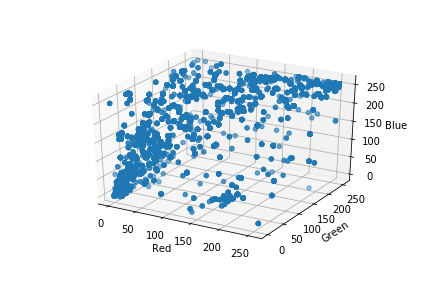

In [25]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib inline
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
xdata = list(df[0])
ydata = list(df[1])
zdata = list(df[2])
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.scatter3D(xdata, ydata, zdata);

Now we want to try using k means to group the average colors into 3 and 5 clusters. 

In [26]:
from sklearn.cluster import KMeans
k_means_3 = KMeans(n_clusters=3)
k_means_3.fit(df)

from collections import Counter, defaultdict
print(Counter(k_means_3.labels_))

k_means_5 = KMeans(n_clusters=5)
k_means_5.fit(df)

from collections import Counter, defaultdict
Counter(k_means_5.labels_)

Counter({0: 3570, 2: 3196, 1: 2562})


Counter({0: 2845, 1: 2280, 2: 488, 3: 1785, 4: 1930})

In [31]:
# Generate Clusters for image colors


def rgb_to_hex(cluster_n):
    hex_clusters = []
    for c in cluster_n:
        l = []
        for i in c:
            l.append(int(i))
        hex_clusters.append('#%02x%02x%02x' % tuple(l))
    return hex_clusters


clusters_3 = k_means_3.cluster_centers_
print(clusters_3)
hex_clusters_3 = rgb_to_hex(clusters_3)
print(hex_clusters_3)
clusters_5 = k_means_5.cluster_centers_
print(clusters_5)
hex_clusters_5 = rgb_to_hex(clusters_5)
print(hex_clusters_5)

[[  39.79187675   45.08823529   73.35882353]
 [ 207.20608899  234.56206089  240.05893833]
 [  61.95525657  142.61733417  197.19774718]]
['#272d49', '#cfeaf0', '#3d8ec5']
[[  35.25975395   87.02495606  150.21968366]
 [  91.96842105  186.63464912  222.63596491]
 [ 191.07172131   53.03278689   52.97336066]
 [  14.50140056   29.57142857   43.18823529]
 [ 228.91088083  241.41968912  243.12901554]]
['#235796', '#5bbade', '#bf3534', '#0e1d2b', '#e4f1f3']


In [46]:
import webcolors

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

def rgb_to_color(rgb):
    l= []
    for i in rgb:
        l.append(int(i))
    color = tuple(l)
    actual_name, closest_name = get_colour_name(color)
    return closest_name
    
cluster_names_3 = []
for rgb in clusters_3:
    cluster_names_3.append(rgb_to_color(rgb))

cluster_names_5 = []
for rgb in clusters_5:
    cluster_names_5.append(rgb_to_color(rgb))

print(cluster_names_3)
print(cluster_names_5)

['darkslategrey', 'lavender', 'steelblue']
['darkslateblue', 'mediumturquoise', 'firebrick', 'black', 'lavender']


In [48]:
df["clusters"] = k_means_5.labels_
df[:5]

,0,1,2,clusters
0,5,36,54,3
1,62,115,146,0
2,37,65,227,0
3,200,37,48,2
4,60,121,175,0


<IPython.core.display.Javascript object>


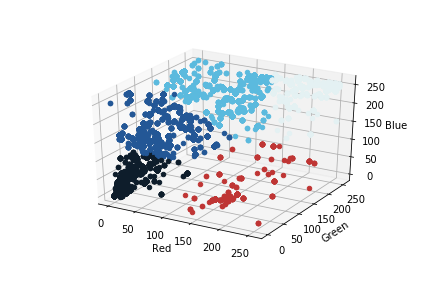

In [49]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(len(df)):
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.scatter(xdata[i], ydata[i], zdata[i], c = hex_clusters_5[df["clusters"][i]])

In [50]:
df["clusters"] = k_means_3.labels_
df[:5]

,0,1,2,clusters
0,5,36,54,0
1,62,115,146,2
2,37,65,227,2
3,200,37,48,0
4,60,121,175,2


<IPython.core.display.Javascript object>


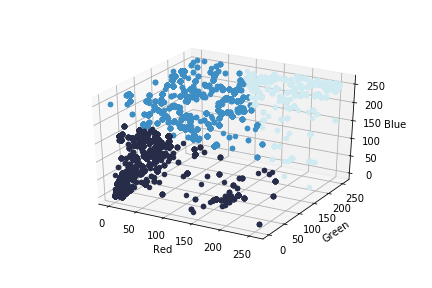

In [51]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(len(df)):
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.scatter(xdata[i], ydata[i], zdata[i], c = hex_clusters_3[df["clusters"][i]])

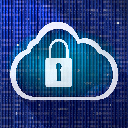

In [86]:
square_img[200]

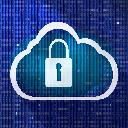

In [10]:
# Open a saved square image
from PIL import Image
Image.open(d + str(200) + ".jpg")

In [35]:
!{sys.executable} -m pip install --upgrade tensorflow
#!{sys.executable} -m pip install -U pip setuptools

  Using cached https://files.pythonhosted.org/packages/27/8c/7608ba709bd536bc2bccb0d1abbb70aafe9cf7e0170353b4b720ed54cb71/tensorflow-1.14.0-cp36-cp36m-macosx_10_11_x86_64.whl
  Found existing installation: wrapt 1.10.11
ERROR: Cannot uninstall 'wrapt'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [30]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

TypeError: softmax() got an unexpected keyword argument 'axis'

PIL image size (128, 128)


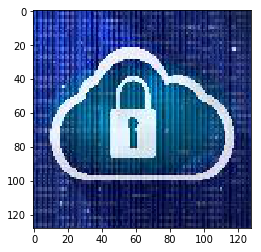

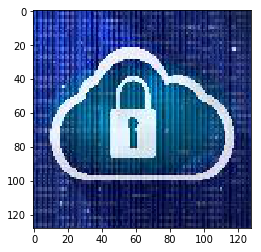

numpy array size (128, 128, 3)
image batch size (1, 128, 128, 3)


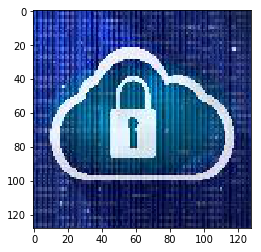

In [16]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
 
filename = d + str(200) + ".jpg"
# load an image in PIL format
original = load_img(filename, target_size=(128,128))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))


In [18]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print(label)


NameError: name 'vgg16' is not defined

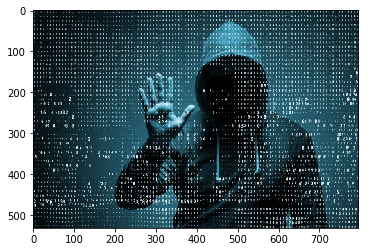

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import cv2
image_url = 'cybersec-imagery/cybersecurity/2018-08-26T01:00:22.723404/0_AI-CyberSecurity-Teaser-796x532.jpg'
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
plt.imshow(pic)
plt.show()

<IPython.core.display.Javascript object>


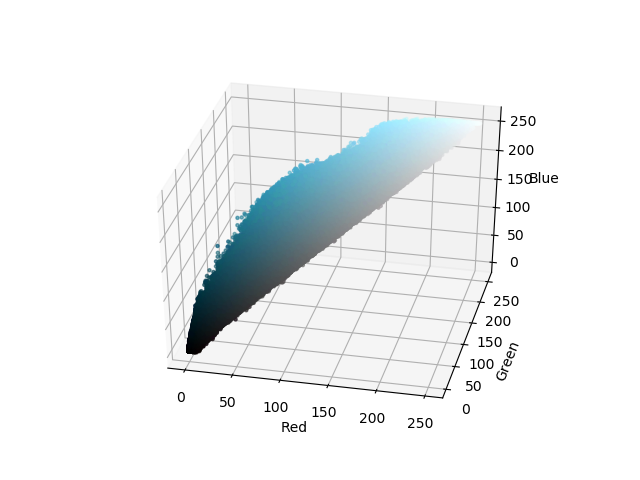

In [36]:
r, g, b = cv2.split(pic)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = pic.reshape((np.shape(pic)[0]*np.shape(pic)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [ ]:
import os, numpy, PIL
from PIL import Image

imlist=images

# Assuming all images are the same size, get dimensions of first image
w,h=Image.open(imlist[0]).size
N=len(imlist)

# Create a numpy array of floats to store the average (assume RGB images)
arr=numpy.zeros((h,w,3),numpy.float)

# Build up average pixel intensities, casting each image as an array of floats
for im in imlist:
    imarr=numpy.array(Image.open(im),dtype=numpy.float)
    arr=arr+imarr/N

# Round values in array and cast as 8-bit integer
arr=numpy.array(numpy.round(arr),dtype=numpy.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("Average.png")
out.show()

10515

In [13]:
import sys
!{sys.executable} -m pip install keras


  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl
    100% |████████████████████████████████| 51kB 1.1MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 2.9MB/s eta 0:00:01


In [ ]:
# Calculate Time

import timeit

start = timeit.default_timer()

####### Code ##########

stop = timeit.default_timer()

print('Time: ', stop - start) 

In [ ]:
start = timeit.default_timer()

for x in a:
    try:
        img = Image.open(x)
        img2 = img.resize((1, 1), Image.ANTIALIAS)
        color2 = img2.getpixel((0, 0))
    except:
        pass

stop = timeit.default_timer()

print('Time: ', stop - start) 

In [ ]:
from io import BytesIO

import requests
from PIL import Image

def generate_hex(image_url):
    img = Image.open(image_url)
    img2 = img.resize((1, 1))
    color = img2.getpixel((0, 0))
    print('#{:02x}{:02x}{:02x}'.format(*color))    
image_url = 'cybersec-imagery/cybersecurity/2018-08-26T01:00:22.723404/0_AI-CyberSecurity-Teaser-796x532.jpg'


In [ ]:
img = Image.open(image_url)
    img2 = img.resize((1, 1))
    color = img2.getpixel((0, 0))
    print('#{:02x}{:02x}{:02x}'.format(*color))   

In [ ]:
image_url = 'cybersec-imagery/cybersecurity/2018-08-26T01:00:22.723404/0_AI-CyberSecurity-Teaser-796x532.jpg'
img = Image.open(image_url)
img2 = img.resize((1, 1), Image.ANTIALIAS)

In [ ]:
img2.getpixel((0, 0))

In [ ]:
img = Image.open(image_url)
img2 = img.resize((1, 1))
color = img2.getpixel((0, 0))
color

In [ ]:
int("13", 16)

In [ ]:
import cv2
import numpy as np
from skimage import io
img = io.imread('cybersec-imagery/cybersecurity/2018-08-26T01:00:22.723404/0_AI-CyberSecurity-Teaser-796x532.jpg')[:, :, :-1]


In [ ]:
average = img.mean(axis=0).mean(axis=0)

In [ ]:
pixels = np.float32(img)

n_colors = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)

In [ ]:
dominant = palette[np.argmax(counts)]

In [ ]:
dominant

In [ ]:
import matplotlib.pyplot as plt

avg_patch = np.ones(shape=img.shape, dtype=np.uint8)*np.uint8(average)

indices = np.argsort(counts)[::-1]   
freqs = np.cumsum(np.hstack([[0], counts[indices]/counts.sum()]))
rows = np.int_(img.shape[0]*freqs)

dom_patch = np.zeros(shape=img.shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
ax0.imshow(avg_patch)
ax0.set_title('Average color')
ax0.axis('off')
ax1.imshow(dom_patch)
ax1.set_title('Dominant colors')
ax1.axis('off')
plt.show(fig)

In [ ]:
1. internet archive
2. distribution of colors: color space
3. 